# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

# Chronic Absenteeism
`cde.ca.gov-absenteeism-2` Last Update: 2019-05-22T19:00:33

_Student absenteeism data by ethnicity, gender, program subgroup, and grade span. Chronic absenteeism counts, cumulative enrollment, and chronic absenteeism rate data are provided._


## Documentation Links

* [Dataset Homepage](https://www.cde.ca.gov/ds/sd/sd/filesabd.asp) 

 
 
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)
 
## Resources

* ** [chronic_absenteeism](data/chronic_absenteeism.csv)**. Combined Chronic Absenteeism files
 
## References

* **[chab17](ftp://ftp.cde.ca.gov/demo/attendance/ChrAbsRate1718.txt#target_format=tsv)**. Chronic Absenteeism 2017-2018
* **[chab16](ftp://ftp.cde.ca.gov/demo/attendance/ChrAbsRate1617.txt#target_format=tsv)**. Chronic Absenteeism 2016-2017

In [3]:
resource_name='chronic_absenteeism'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
year,integer,Year taken from the source dataset name.
academic_year,string,The academic year (July 1 – June 30) corresponding to the time period during which the data were collected.
aggregate_level,string,T = State C = County D1 = District (All Schools) D2 = District (Non-Charter Schools) S = School
county_code,integer,A unique two-digit code corresponding to the county.
district_code,integer,A unique five-digit code corresponding to the district.
school_code,integer,A unique seven-digit code corresponding to the school.
county_name,string,County Name
district_name,string,District or Administrative Authority Name
school_name,string,School Name
is_charter,string,"A ""Y"" or ""N"" value indicating whether a school is a charter school in the current academic year."


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,year,academic_year,aggregate_level,county_code,district_code,school_code,county_name,district_name,school_name,is_charter,reporting_category,cumulative_enrollment,chronic_absenteeism_count,cumulative_eligible_enrollment,chronic_absenteeism_rate
0,17,2017-18,C,1.0,NaN,NaN,Alameda,NaN,NaN,NaN,GF,114424.0,113231.0,11448.0,10.1
1,17,2017-18,C,1.0,NaN,NaN,Alameda,NaN,NaN,NaN,GM,121612.0,119966.0,12531.0,10.4
2,17,2017-18,C,1.0,NaN,NaN,Alameda,NaN,NaN,NaN,GR13,53709.0,53198.0,4402.0,8.3
3,17,2017-18,C,1.0,NaN,NaN,Alameda,NaN,NaN,NaN,GR46,53798.0,53310.0,3851.0,7.2
4,17,2017-18,C,1.0,NaN,NaN,Alameda,NaN,NaN,NaN,GR78,35304.0,34987.0,2710.0,7.7


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,0
datetime,0
number,8
other,7


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477282 entries, 0 to 477281
Data columns (total 8 columns):
year                              477282 non-null int64
county_code                       477257 non-null float64
district_code                     474409 non-null float64
school_code                       432126 non-null float64
cumulative_enrollment             355526 non-null float64
chronic_absenteeism_count         177896 non-null float64
cumulative_eligible_enrollment    355526 non-null float64
chronic_absenteeism_rate          355526 non-null float64
dtypes: float64(7), int64(1)
memory usage: 29.1 MB


None

,count,mean,std,min,25%,50%,75%,max
year,477282.0,1.650129e+01,4.999989e-01,16.0,16.0,17.0,17.0,17.0
county_code,477257.0,2.912615e+01,1.438701e+01,0.0,19.0,30.0,39.0,58.0
district_code,474409.0,6.552303e+04,1.163580e+04,10017.0,64725.0,67173.0,69799.0,77107.0
school_code,432126.0,3.803646e+06,2.733103e+06,0.0,124964.0,6010276.0,6047401.0,9010745.0
cumulative_enrollment,355526.0,1.040281e+03,2.786624e+04,11.0,51.0,173.0,439.0,6405496.0
chronic_absenteeism_count,177896.0,1.013721e+03,2.754405e+04,0.0,48.0,165.0,423.0,6315131.0
cumulative_eligible_enrollment,355526.0,1.192674e+02,3.130386e+03,0.0,5.0,17.0,47.0,702531.0
chronic_absenteeism_rate,355526.0,1.436070e+01,1.472151e+01,0.0,5.7,10.3,17.3,100.0


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


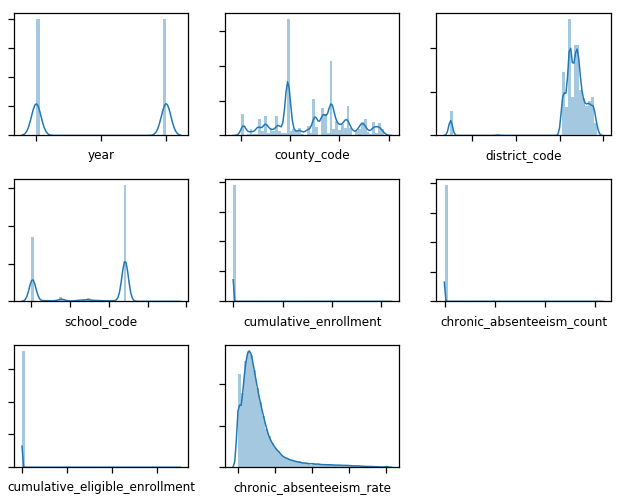

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

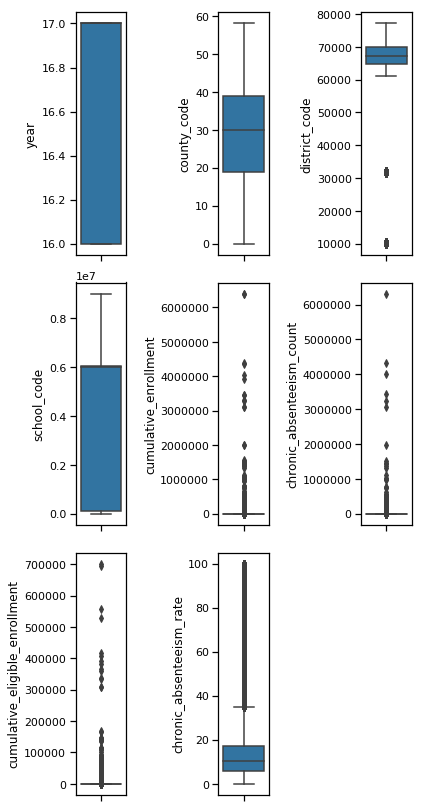

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

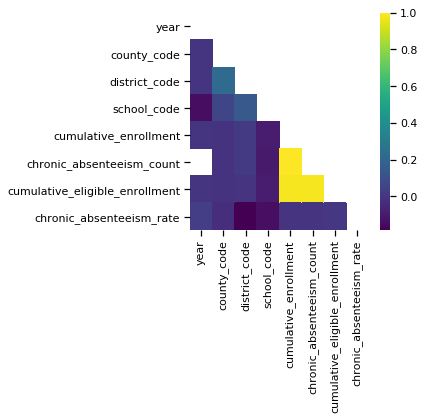

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477282 entries, 0 to 477281
Data columns (total 7 columns):
academic_year         477282 non-null object
aggregate_level       477282 non-null object
county_name           477257 non-null object
district_name         474409 non-null object
school_name           432126 non-null object
is_charter            410374 non-null object
reporting_category    477282 non-null object
dtypes: object(7)
memory usage: 25.5+ MB


None

,count,unique,top,freq
academic_year,477282,2,2017-18,239257
aggregate_level,477282,5,S,389614
county_name,477257,59,Los Angeles,92499
district_name,474409,1022,Los Angeles Unified,36120
school_name,432126,8988,District Office,44042
is_charter,410374,2,N,364596
reporting_category,477282,32,TA,25288


# Nulls


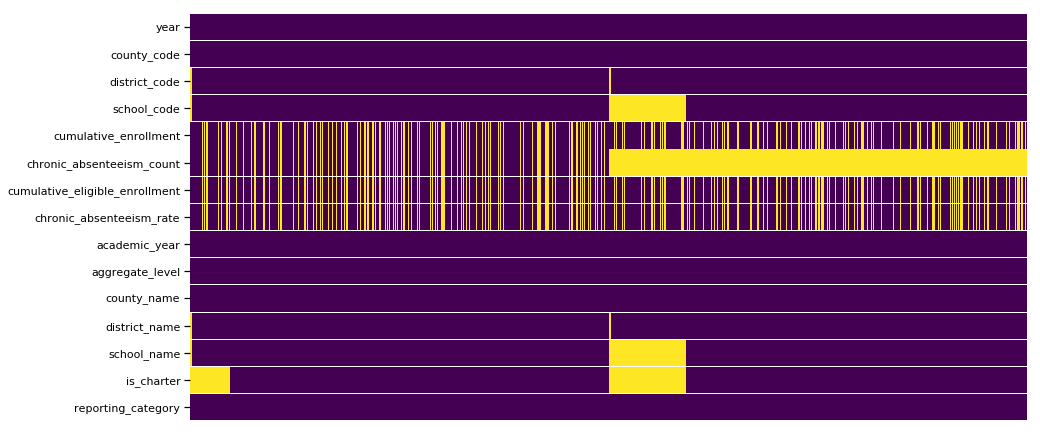

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )